In [34]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [35]:
sns.set()

## 數據集

In [36]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [37]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [38]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [39]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
boston["MEDV"] = boston_dataset.target

In [41]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 取features
### <font color="#0000dd">保留</font>
* <font color="#0000dd">CRIM - 城鎮人均犯罪率
* <font color="#0000dd">INDUS - 每個城鎮中非商業用地佔比例
* <font color="#0000dd">NOX - 一氧化氮濃度（每千萬份
* <font color="#0000dd">RM - 每棟住宅房間數
* <font color="#0000dd">DIS -波士頓的五個就業中心加權距離
* <font color="#0000dd">RAD - 徑向高速公路的可達性指數
* <font color="#0000dd">TAX - 每一萬美元的不動產稅率
* <font color="#0000dd">B - 城鎮中黑人比例
* <font color="#0000dd">LSTAT - 房東屬於低等收入階層比例
* <font color="#0000dd">MEDV - 自住房屋房價中位數

### <font color="#dd0000">刪除</font>
* <font color="#dd0000">ZN - 住宅用地所佔比例
* <font color="#dd0000">CHAS - Charles River虛擬變量（如果是河道，則為1;否則為0
* <font color="#dd0000">AGE - 1940年以前建造的自住單位比例
* <font color="#dd0000">PTRATIO - 城鎮的學生與教師比例

In [42]:
boston.drop(['ZN','CHAS','AGE','PTRATIO'], axis = 1, inplace = True)

In [45]:
boston

,CRIM,INDUS,NOX,RM,DIS,RAD,TAX,B,LSTAT,MEDV
0,-0.419782,2.31,-0.144217,0.413672,0.140214,-0.982843,-0.666608,0.441052,-1.075562,24.0
1,-0.417339,7.07,-0.740262,0.194274,0.557160,-0.867883,-0.987329,0.441052,-0.492439,21.6
2,-0.417342,7.07,-0.740262,1.282714,0.557160,-0.867883,-0.987329,0.396427,-1.208727,34.7
3,-0.416750,2.18,-0.835284,1.016303,1.077737,-0.752922,-1.106115,0.416163,-1.361517,33.4
4,-0.412482,2.18,-0.835284,1.228577,1.077737,-0.752922,-1.106115,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,11.93,0.158124,0.439316,-0.625796,-0.982843,-0.803212,0.387217,-0.418147,22.4
502,-0.415249,11.93,0.158124,-0.234548,-0.716639,-0.982843,-0.803212,0.441052,-0.500850,20.6
503,-0.413447,11.93,0.158124,0.984960,-0.773684,-0.982843,-0.803212,0.441052,-0.983048,23.9
504,-0.407764,11.93,0.158124,0.725672,-0.668437,-0.982843,-0.803212,0.403225,-0.865302,22.0


### 標準化

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
feature_names = ['CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
boston[feature_names] = scaler.fit_transform(boston[feature_names])
boston.head()

,CRIM,INDUS,NOX,RM,DIS,RAD,TAX,B,LSTAT,MEDV
0,-0.419782,2.31,-0.144217,0.413672,0.140214,-0.982843,-0.666608,0.441052,-1.075562,24.0
1,-0.417339,7.07,-0.740262,0.194274,0.557160,-0.867883,-0.987329,0.441052,-0.492439,21.6
2,-0.417342,7.07,-0.740262,1.282714,0.557160,-0.867883,-0.987329,0.396427,-1.208727,34.7
3,-0.416750,2.18,-0.835284,1.016303,1.077737,-0.752922,-1.106115,0.416163,-1.361517,33.4
4,-0.412482,2.18,-0.835284,1.228577,1.077737,-0.752922,-1.106115,0.441052,-1.026501,36.2


### 相關係數

In [63]:
boston.corr().round(2)

,CRIM,INDUS,NOX,RM,DIS,RAD,TAX,B,LSTAT,MEDV
CRIM,1.00,0.41,0.42,-0.22,-0.38,0.63,0.58,-0.39,0.46,-0.39
INDUS,0.41,1.00,0.76,-0.39,-0.71,0.60,0.72,-0.36,0.60,-0.48
NOX,0.42,0.76,1.00,-0.30,-0.77,0.61,0.67,-0.38,0.59,-0.43
RM,-0.22,-0.39,-0.30,1.00,0.21,-0.21,-0.29,0.13,-0.61,0.70
DIS,-0.38,-0.71,-0.77,0.21,1.00,-0.49,-0.53,0.29,-0.50,0.25
RAD,0.63,0.60,0.61,-0.21,-0.49,1.00,0.91,-0.44,0.49,-0.38
TAX,0.58,0.72,0.67,-0.29,-0.53,0.91,1.00,-0.44,0.54,-0.47
B,-0.39,-0.36,-0.38,0.13,0.29,-0.44,-0.44,1.00,-0.37,0.33
LSTAT,0.46,0.60,0.59,-0.61,-0.50,0.49,0.54,-0.37,1.00,-0.74
MEDV,-0.39,-0.48,-0.43,0.70,0.25,-0.38,-0.47,0.33,-0.74,1.00


In [64]:
corr = boston.corr().round(2)

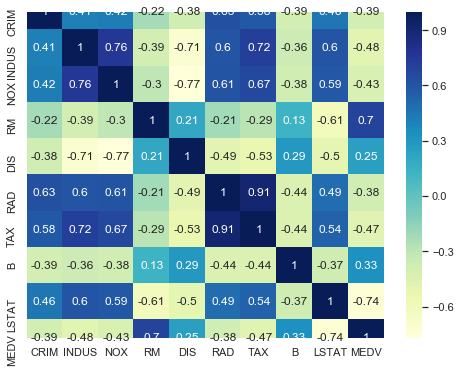

In [82]:
plt.figure(figsize=(8,6))
sns.set(rc = {"figure.figsize":(11.7, 8.27)})
sns.heatmap(corr, cmap='YlGnBu', annot = True)

### 訓練資料

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = boston.loc[:, "CRIM":"LSTAT"].values
Y = boston.MEDV

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [54]:
len(x_train)

404

### 數據分析

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [69]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
y_predict = model.predict(x_test)

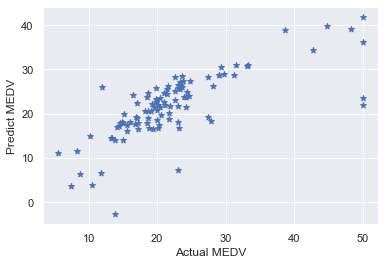

In [80]:
plt.figure(figsize=(6,4))
plt.xlabel('Actual MEDV')
plt.ylabel('Predict MEDV')
plt.scatter(y_test, y_predict, marker='*', c='b')

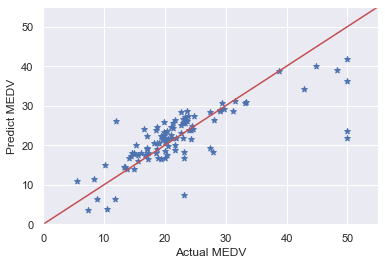

In [81]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_predict, marker='*', c='b')
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.xlabel('Actual MEDV')
plt.ylabel('Predict MEDV')
plt.plot([0,55], [0,55], "r")